In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from env import user, host, password
def get_db_url(db, user=user, host=host, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [2]:
url = get_db_url("employees")

In [3]:
query = """
SELECT * FROM employees LIMIT 10
"""

In [4]:
pd.read_sql(query, url)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
5,10006,1953-04-20,Anneke,Preusig,F,1989-06-02
6,10007,1957-05-23,Tzvetan,Zielinski,F,1989-02-10
7,10008,1958-02-19,Saniya,Kalloufi,M,1994-09-15
8,10009,1952-04-19,Sumant,Peac,F,1985-02-18
9,10010,1963-06-01,Duangkaew,Piveteau,F,1989-08-24


In [5]:
url = get_db_url("employees")
employees = pd.read_sql("""SELECT * FROM employees""", url)

In [6]:
titles = pd.read_sql("""SELECT * FROM titles""", get_db_url("employees"))

In [7]:
titles

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...
443303,499997,Engineer,1987-08-30,1992-08-29
443304,499997,Senior Engineer,1992-08-29,9999-01-01
443305,499998,Senior Staff,1998-12-27,9999-01-01
443306,499998,Staff,1993-12-27,1998-12-27


In [8]:
# How many unique titles are in the titles DataFrame?
# Do we use SQL? Do we use Pandas? When do we use both? Is it 50/50? 
# Welcome to Analysis Paralysis!
# "It depends"
# but WHAT does our answer depend on?

### How many unique titles are there?
- We could solve with SQL in one or two ways:
    - SELECT DISTINCT title from titles
    - SELECT titles from titles group by title
- Or we could read the entire SQL query/table into a pandas dataframe
    - then use .unique from pandas
   
- If you know you're going to need that whole titles table and historic data the rest of your notebook:
    - Then read the entire titles table into a dataframe
    - We can join dataframes together exactly how we joined tables together
    - Once you save a query to a dataframe, that dataframe exists in memory

In [9]:
sql = """
SELECT DISTINCT title from titles;
"""
unique_titles = pd.read_sql(sql, url)
unique_titles

,title
0,Senior Engineer
1,Staff
2,Engineer
3,Senior Staff
4,Assistant Engineer
5,Technique Leader
6,Manager


In [10]:
sql = """
SELECT title from titles;
"""
all_titles = pd.read_sql(sql, url)
all_titles

,title
0,Senior Engineer
1,Staff
2,Senior Engineer
3,Engineer
4,Senior Engineer
...,...
443303,Engineer
443304,Senior Engineer
443305,Senior Staff
443306,Staff


In [11]:
all_titles.title.unique()

array(['Senior Engineer', 'Staff', 'Engineer', 'Senior Staff',
       'Assistant Engineer', 'Technique Leader', 'Manager'], dtype=object)

Display the summary statistics for each DataFrame.

- I can look at all of my columns no matter the data type if I like.

In [12]:
titles.describe(include='all')

,emp_no,title,from_date,to_date
count,443308.000000,443308,443308,443308
unique,NaN,7,6393,5888
top,NaN,Engineer,1998-10-25,9999-01-01
freq,NaN,115003,132,240124
mean,253075.034430,NaN,NaN,NaN
std,161853.292613,NaN,NaN,NaN
min,10001.000000,NaN,NaN,NaN
25%,84855.750000,NaN,NaN,NaN
50%,249847.500000,NaN,NaN,NaN
75%,424891.250000,NaN,NaN,NaN


In [13]:
employees.describe(include='all')

,emp_no,birth_date,first_name,last_name,gender,hire_date
count,300024.000000,300024,300024,300024,300024,300024
unique,NaN,4750,1275,1637,2,5434
top,NaN,1952-03-08,Shahab,Baba,M,1985-06-20
freq,NaN,95,295,226,179973,132
mean,253321.763392,NaN,NaN,NaN,NaN,NaN
std,161828.235540,NaN,NaN,NaN,NaN,NaN
min,10001.000000,NaN,NaN,NaN,NaN,NaN
25%,85006.750000,NaN,NaN,NaN,NaN,NaN
50%,249987.500000,NaN,NaN,NaN,NaN,NaN
75%,424993.250000,NaN,NaN,NaN,NaN,NaN


___

In [14]:
titles.title.describe()

count       443308
unique           7
top       Engineer
freq        115003
Name: title, dtype: object

___

What is the oldest date in the to_date column?

In [15]:
titles.to_date.sort_values().head(1)

16064    1985-03-01
Name: to_date, dtype: object

## Exercises II

### Joining and Merging

- What are my options? 

```python
# default arguments for .merge()

pd.merge(left_df, right_df, how='inner', on=None, left_on=None, right_on=None, 
         left_index=False, right_index=False, sort=True, suffixes='_x', '_y', 
         copy=True, indicator=False, validate=None)
```

- How does changing the default argument of the `how` parameter change my resulting DataFrame?

**Type of merge to be performed.**

`how=left`: preserve rows from left DataFrame and from the right DataFrame, only those rows that have a match, similar to a SQL left outer join.

`how=right`: preserve rows from right DataFrame and from the left DataFrame, only those rows that have a match, similar to a SQL right outer join.

`how=outer`: use the union of rows from both DataFrames, similar to a SQL full outer join.

`how=inner`: use the intersection of rows from both DataFrames; return only rows that are present in both DataFrames, similar to a SQL inner join; preserve the order of the left keys.

In [16]:
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})

users

,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN


In [17]:
roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})

roles

,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


___

#### 2. 

What do you think a right join would look like? 

- Jane and Mike are not included because they had NaN values in the foreign key column, `role_id`.


- The `commenter` role is included even through it is not present in the left table in the join.


- A right join uses only the keys from the right DataFrame.
    - If I set `indicator=True`, I can get a good picture of which rows are coming from where.
    - Notice that I only get back rows that are in `both` or `right_only` in a right join.

In [18]:
right_join = users.merge(roles, 
                         left_on='role_id', 
                         right_on='id', 
                         how='right',
                         indicator=True)
right_join

,id_x,name_x,role_id,id_y,name_y,_merge
0,1.0,bob,1.0,1,admin,both
1,2.0,joe,2.0,2,author,both
2,3.0,sally,3.0,3,reviewer,both
3,4.0,adam,3.0,3,reviewer,both
4,NaN,NaN,NaN,4,commenter,right_only


In [19]:
# I can use method chaining to make my resulting DataFrame how I want.

clean_right = users.merge(roles, 
                          left_on='role_id', 
                          right_on='id', 
                          how='right').drop(columns='role_id').rename(columns={'id_x': 'id', 
                                                                         'name_x': 'employee',
                                                                         'id_y': 'role_id',
                                                                         'name_y': 'role'}
                                                                )
clean_right

,id,employee,role_id,role
0,1.0,bob,1,admin
1,2.0,joe,2,author
2,3.0,sally,3,reviewer
3,4.0,adam,3,reviewer
4,NaN,NaN,4,commenter


___

#### 3. 

What would an outer join look like? 

- This returns a DataFrame with all of the rows from both tables.


- Again, setting `indicator=True` allows me to see exactly what's happening here.
    - In outer join, I receive rows that are in `both`, `left_only`, and `right_only`.
    - Basically, I get all of the rows from both DataFrames.

In [20]:
pd.merge(users, 
         roles, 
         left_on='role_id', 
         right_on='id', 
         how='outer',
        indicator=True)

,id_x,name_x,role_id,id_y,name_y,_merge
0,1.0,bob,1.0,1.0,admin,both
1,2.0,joe,2.0,2.0,author,both
2,3.0,sally,3.0,3.0,reviewer,both
3,4.0,adam,3.0,3.0,reviewer,both
4,5.0,jane,NaN,NaN,NaN,left_only
5,6.0,mike,NaN,NaN,NaN,left_only
6,NaN,NaN,NaN,4.0,commenter,right_only


In [21]:
pd.merge(users, 
         roles, 
         left_on='role_id', 
         right_on='id', 
         how='outer').drop(columns='role_id').rename(columns={'id_x': 'id', 
                                                            'name_x': 'employee',
                                                            'id_y': 'role_id',
                                                            'name_y': 'role'}
                                                    )

,id,employee,role_id,role
0,1.0,bob,1.0,admin
1,2.0,joe,2.0,author
2,3.0,sally,3.0,reviewer
3,4.0,adam,3.0,reviewer
4,5.0,jane,NaN,NaN
5,6.0,mike,NaN,NaN
6,NaN,NaN,4.0,commenter


___

#### 4. 

What happens if you drop the foreign keys from the dataframes and try to merge them?

- If I drop the foreign key of `role_id`, I have a very confusing situation!


- If I join on `id`, I'm making a big mistake now.

In [22]:
users_drop = users.drop(columns='role_id')
users_drop

,id,name
0,1,bob
1,2,joe
2,3,sally
3,4,adam
4,5,jane
5,6,mike


In [23]:
roles

,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


In [24]:
# The result is not good. Now Adam is a commenter, and that is not true.

pd.merge(users_drop, roles, on='id')

,id,name_x,name_y
0,1,bob,admin
1,2,joe,author
2,3,sally,reviewer
3,4,adam,commenter


In [25]:
# Here is how they should be joined. Adam is a reviewer.

pd.merge(users, roles, left_on='role_id', right_on='id')

,id_x,name_x,role_id,id_y,name_y
0,1,bob,1.0,1,admin
1,2,joe,2.0,2,author
2,3,sally,3.0,3,reviewer
3,4,adam,3.0,3,reviewer


#### 5.  

Load the mpg dataset. Read the documentation for it, and use the data to answer these questions:

In [26]:
from pydataset import data

In [27]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


#### 6.

Output and read the documentation for the mpg dataset.

In [28]:
data('mpg', show_doc=True)

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




#### 7. 

How many rows and columns are in the dataset?

In [29]:
mpg.shape

(234, 11)

#### 8.

Check out your column names and perform any cleanup you may want on them.

- I'm just doing a little data prep here to get my DataFrame the way I left it in the DataFrames exercises and clean up column names.

In [30]:
mpg.columns.tolist()

['manufacturer',
 'model',
 'displ',
 'year',
 'cyl',
 'trans',
 'drv',
 'cty',
 'hwy',
 'fl',
 'class']

In [31]:
# Renaming city and highway columns.

mpg.columns = ['manufacturer', 'model', 'displacement', 'year', 'cylinders', 'transmission', 'drive', 'city','highway', 'fuel', 'class']

In [32]:
# Creating average_mileage and mileage_difference columns.

mpg = mpg.assign(mileage_difference = mpg.highway - mpg.city,
                 average_mileage = (mpg.city + mpg.highway) / 2)

mpg.head()

,manufacturer,model,displacement,year,cylinders,transmission,drive,city,highway,fuel,class,mileage_difference,average_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10,21.0


___

#### 9.

Display the summary statistics for the dataset.

In [33]:
mpg.describe()

,displacement,year,cylinders,city,highway,mileage_difference,average_mileage
count,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171,6.581197,20.149573
std,1.291959,4.509646,1.611534,4.255946,5.954643,2.262739,5.050290
min,1.600000,1999.000000,4.000000,9.000000,12.000000,2.000000,10.500000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000,5.000000,15.500000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000,7.000000,20.500000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000,8.000000,23.500000
max,7.000000,2008.000000,8.000000,35.000000,44.000000,12.000000,39.500000


In [34]:
mpg.describe(exclude=np.number)

,manufacturer,model,transmission,drive,fuel,class
count,234,234,234,234,234,234
unique,15,38,10,3,5,7
top,dodge,caravan 2wd,auto(l4),f,r,suv
freq,37,11,83,106,168,62


___

#### 10.

How many different manufacturers are there?

In [35]:
mpg.manufacturer.nunique()

15

In [36]:
mpg.manufacturer.value_counts()

dodge         37
toyota        34
volkswagen    27
ford          25
chevrolet     19
audi          18
subaru        14
hyundai       14
nissan        13
honda          9
jeep           8
pontiac        5
mercury        4
land rover     4
lincoln        3
Name: manufacturer, dtype: int64

___

#### 11.

How many different models are there?

In [37]:
mpg.model.nunique()

38

In [38]:
mpg.model.value_counts()

caravan 2wd               11
ram 1500 pickup 4wd       10
civic                      9
dakota pickup 4wd          9
jetta                      9
mustang                    9
impreza awd                8
grand cherokee 4wd         8
a4 quattro                 8
passat                     7
camry solara               7
toyota tacoma 4wd          7
f150 pickup 4wd            7
durango 4wd                7
tiburon                    7
camry                      7
sonata                     7
a4                         7
altima                     6
4runner 4wd                6
forester awd               6
explorer 4wd               6
new beetle                 6
malibu                     5
corolla                    5
gti                        5
corvette                   5
grand prix                 5
c1500 suburban 2wd         5
range rover                4
pathfinder 4wd             4
k1500 tahoe 4wd            4
mountaineer 4wd            4
navigator 2wd              3
expedition 2wd

___

#### 12. - 14.

Create a column named mileage_difference like you did in the DataFrames exercises; this column should contain the difference between highway and city mileage for each car.

```python
# I can do numbers 12-14 one at a time like this.

mpg['mileage_difference'] = mpg.highway - mpg.city

mpg['average_mileage'] = (mpg.highway + mpg.city) / 2

mpg['is_automatic'] = mpg.transmission.str.startswith('a')
```

In [39]:
# Or I can use .assign to create multiple columns at once.

mpg = mpg.assign(mileage_difference = mpg.highway - mpg.city,
                 average_mileage = (mpg.highway + mpg.city) / 2,
                 is_automatic = mpg.transmission.str.startswith('a'))

In [40]:
mpg.head()

,manufacturer,model,displacement,year,cylinders,transmission,drive,city,highway,fuel,class,mileage_difference,average_mileage,is_automatic
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11,23.5,True
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8,25.0,False
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11,25.5,False
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9,25.5,True
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10,21.0,True


___

#### 15. 

Using the mpg dataset, find out which which manufacturer has the best miles per gallon on average?

- I'll look at this question in a couple of different ways.


- The main takeaway here:  
    - we can use the `.groupby()` method on a column and perform an aggregation on another, or other, column(s).


- I can look at the highest average for `average_mileage` by `manufacturer` as a target.


**- The manufacturer is our dimension and the mean of average_mileage is our metric.**

In [41]:
# Here I perform my groupby and aggregation and sort the values.

mpg.groupby('manufacturer').average_mileage.mean().sort_values(ascending=False).round(2)

manufacturer
honda         28.50
volkswagen    25.07
hyundai       22.75
subaru        22.43
audi          22.03
toyota        21.72
pontiac       21.70
nissan        21.35
chevrolet     18.45
ford          16.68
mercury       15.62
jeep          15.56
dodge         15.54
lincoln       14.17
land rover    14.00
Name: average_mileage, dtype: float64

In [42]:
# Here I perform my groupby and aggregation with .nlargest().

mpg.groupby('manufacturer').average_mileage.mean().nlargest(n=1, keep='all')

manufacturer
honda    28.5
Name: average_mileage, dtype: float64

In [43]:
# Here I perform my groupby and aggregation with .idxmax().

mpg.groupby('manufacturer').average_mileage.mean().idxmax()

'honda'

___

- No matter if I look at the average city mileage, average highway mileage, or the average average mileage (which I hear is a mathematical sin), Honda is the winner here. 

In [44]:
# I can also perform that aggregation on a list of columns and sort by one.

mpg.groupby('manufacturer')[['city', 'highway', 'average_mileage']].mean().sort_values(by='average_mileage', ascending=False).round(2)


,city,highway,average_mileage
manufacturer,,,
honda,24.44,32.56,28.50
volkswagen,20.93,29.22,25.07
hyundai,18.64,26.86,22.75
subaru,19.29,25.57,22.43
audi,17.61,26.44,22.03
toyota,18.53,24.91,21.72
pontiac,17.00,26.40,21.70
nissan,18.08,24.62,21.35
chevrolet,15.00,21.89,18.45


___

Multi-column groupby

- I can `.groupby()` multiple columns and go more granular. 


- What if I wanted to know which manufacturer and model gets the best highway mileage?

In [45]:
multi_models = mpg.groupby(['manufacturer', 'model'])[['highway']].agg(['mean', 'count']).sort_values(by=('highway', 'mean'), ascending=False)
multi_models

highway      
                                          mean count
manufacturer model                                  
toyota       corolla                 34.000000     5
volkswagen   new beetle              32.833333     6
honda        civic                   32.555556     9
volkswagen   jetta                   29.111111     9
nissan       altima                  28.666667     6
audi         a4                      28.285714     7
toyota       camry                   28.285714     7
             camry solara            28.142857     7
hyundai      sonata                  27.714286     7
chevrolet    malibu                  27.600000     5
volkswagen   passat                  27.571429     7
             gti                     27.400000     5
pontiac      grand prix              26.400000     5
subaru       impreza awd             26.000000     8
hyundai      tiburon                 26.000000     7
audi         a4 quattro              25.750000     8
nissan       maxima                  25.333333     3
subaru       forester awd            25.000000     6
chevrolet    corvette                24.800000     5
audi         a6 quattro              24.000000     3
ford         mustang                 23.222222     9
dodge        caravan 2wd             22.363636    11
toyota       toyota tacoma 4wd       19.428571     7
             4runner 4wd             18.833333     6
ford         explorer 4wd            18.000000     6
mercury      mountaineer 4wd         18.000000     4
nissan       pathfinder 4wd          18.000000     4
chevrolet    c1500 suburban 2wd      17.800000     5
jeep         grand cherokee 4wd      17.625000     8
ford         expedition 2wd          17.333333     3
dodge        dakota pickup 4wd       17.000000     9
lincoln      navigator 2wd           17.000000     3
toyota       land cruiser wagon 4wd  16.500000     2
land rover   range rover             16.500000     4
ford         f150 pickup 4wd         16.428571     7
chevrolet    k1500 tahoe 4wd         16.250000     4
dodge        durango 4wd             16.000000     7
             ram 1500 pickup 4wd     15.300000    10

In [46]:
multi_models.columns = ['highway_mean', 'highway_count']

In [47]:
# Which manufacturer and model get the best highway mileage?

multi_models.nlargest(1, 'highway_mean', keep='all')

,,highway_mean,highway_count
manufacturer,model,,
toyota,corolla,34.0,5


___

#### 16. 

Do automatic or manual cars have better miles per gallon?

- I can simply do a `groupby` on my `is_automatic` column and get the average of `city` and `highway`.

**- The `is_automatic` is our dimension, and the mean of city mileage and mean of highway mileage are our metrics in this case.**

- I could also create another new column, `transmission_category`, that contains `auto` if a car has any type of automatic transmission and `manual` if a car has any type of manual transmission. 
    
    
- Then, I can use `transmission_category` to group my data by automatic or manual transmission.


**- The `transmission_category` is our dimension, and the mean of city mileage and mean of highway mileage are our metrics in this case.**

In [48]:
# I can group by my boolean column and get the average of city and highway.

mpg.groupby('is_automatic')[['city', 'highway']].mean().sort_values(by='highway', ascending=False)

,city,highway
is_automatic,,
False,18.675325,25.779221
True,15.968153,22.292994


In [49]:
# I check the values in the `transmission` column to see what I'm working with.

mpg.transmission.value_counts()

auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s4)       3
auto(s5)       3
auto(l3)       2
Name: transmission, dtype: int64

In [50]:
mpg['transmission_category'] = np.where(mpg.transmission.str.startswith('a'), 'auto', 'manual')
mpg.head()

,manufacturer,model,displacement,year,cylinders,transmission,drive,city,highway,fuel,class,mileage_difference,average_mileage,is_automatic,transmission_category
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11,23.5,True,auto
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8,25.0,False,manual
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11,25.5,False,manual
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9,25.5,True,auto
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10,21.0,True,auto


In [51]:
# The average mileage of manual transmission cars is better per gallon, city or highway.

mpg.groupby('transmission_category')[['city', 'highway']].mean()

,city,highway
transmission_category,,
auto,15.968153,22.292994
manual,18.675325,25.779221


___

In [52]:
# I can decide to make a boolean Series and assign it to my dataframe.

mpg['is_automatic'] = mpg.transmission.str.startswith('a')
mpg.head()

,manufacturer,model,displacement,year,cylinders,transmission,drive,city,highway,fuel,class,mileage_difference,average_mileage,is_automatic,transmission_category
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11,23.5,True,auto
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8,25.0,False,manual
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11,25.5,False,manual
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9,25.5,True,auto
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10,21.0,True,auto


___

<hr style="border-top: 10px groove blueviolet; margin-top: 1px; margin-bottom: 1px"></hr>

## Exercises III

#### 1. 

Use your get_db_url function to help you explore the data from the chipotle database.

In [53]:
chipotle_sql_query = '''
                     SELECT *
                     FROM orders;
                     '''

In [54]:
orders = pd.read_sql(chipotle_sql_query, get_db_url('chipotle'))
orders.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [55]:
# Check the size of the data I'm bringing in.

orders.shape

(4622, 6)

In [56]:
# Look at the non-null values and data types of my columns.

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  4622 non-null   int64 
 1   order_id            4622 non-null   int64 
 2   quantity            4622 non-null   int64 
 3   item_name           4622 non-null   object
 4   choice_description  4622 non-null   object
 5   item_price          4622 non-null   object
dtypes: int64(3), object(3)
memory usage: 216.8+ KB


#### 2. 

What is the total price for each order?

- **Order, `order_id`, is our dimension, and the total price, `item_price.sum()` is our metric.**


- `item_price` is an object, so before I can treat it like a float, I have to clean it up.

In [57]:
# Reassign my cleanup to item_price in my df.

orders['item_price'] = orders.item_price.str.replace('$', '').astype(float)
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  4622 non-null   int64  
 1   order_id            4622 non-null   int64  
 2   quantity            4622 non-null   int64  
 3   item_name           4622 non-null   object 
 4   choice_description  4622 non-null   object 
 5   item_price          4622 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 216.8+ KB


<ipython-input-57-641dcc946cd3>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  orders['item_price'] = orders.item_price.str.replace('$', '').astype(float)


In [58]:
order_totals = orders.groupby('order_id').item_price.sum()
order_totals.sample(10)

order_id
233     29.75
1671    13.25
827     11.38
1502    23.50
829     12.95
1042    12.39
1832    13.20
1525    15.74
1069    12.75
760     22.50
Name: item_price, dtype: float64

___

#### 3. 

What are the most popular 3 items?

- **Items, `item_name`, is our dimension, and the total number ordered, `quantity.sum()` is our metric.**


- Basically, which three items are ordered the most.**

In [63]:
top_three = orders.groupby('item_name').quantity.sum().sort_values(ascending=False).head(3)
top_three

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Name: quantity, dtype: int64

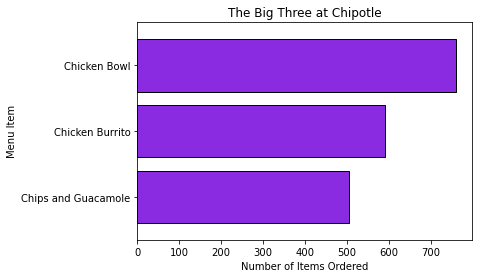

In [64]:
top_three.plot(kind='barh',
             color='blueviolet', 
             ec='black', 
             width=.8)

plt.title('The Big Three at Chipotle')
plt.xlabel('Number of Items Ordered')
plt.ylabel('Menu Item')

# reorder y-axis of horizontal bar chart
plt.gca().invert_yaxis()

plt.show()

___

#### 4. 

Which item has produced the most revenue?

- **Items, `item_name`, is our dimension, and a total of price, `item_price`.sum(), is our metric.**


- With a little investigating, we see that `item_price` is really like a calulation of the quantity of an item in an order times the item's price. This confused me at first, so make sure to get to know your data a little before you dig in.

In [65]:
orders.sample(5)

,id,order_id,quantity,item_name,choice_description,item_price
1108,1109,458,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Cheese]]",8.75
797,798,327,1,Veggie Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables, Rice, Sour Cream, Guacamole, Lettuce]]",11.25
1107,1108,457,1,Chicken Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice, Sour Cream, Lettuce]]",8.75
2875,2876,1142,1,Steak Burrito,"[Tomatillo-Red Chili Salsa (Hot), [Pinto Beans, Cheese, Sour Cream, Lettuce]]",8.99
4437,4438,1768,1,Carnitas Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice, Black Beans, Cheese, Sour Cream, Guacam...",11.75


In [66]:
# I can return the item(s) with the highest revenue using .nlargest().

orders.groupby('item_name').item_price.sum().nlargest(1)

item_name
Chicken Bowl    7342.73
Name: item_price, dtype: float64

In [67]:
# This way I get just the item name with the highest revenue.

orders.groupby('item_name').item_price.sum().nlargest(1)

item_name
Chicken Bowl    7342.73
Name: item_price, dtype: float64

In [68]:
# I could sort my values and return the top ones using .head() if I wanted.

orders.groupby('item_name').item_price.sum().sort_values(ascending=False).head(1)

item_name
Chicken Bowl    7342.73
Name: item_price, dtype: float64

___

#### 5. 

Join the employees and titles dataframes together.
```python
left_df.merge(left_df, right_df, how='inner', on=None, left_on=None, right_on=None)
```

In [69]:
employees.shape

(300024, 6)

In [70]:
titles.shape

(443308, 4)

In [71]:
# Merge the DataFrames into all_emp_titles.

all_emp_titles = employees.merge(titles, on='emp_no')
all_emp_titles.shape

(443308, 9)

In [72]:
# Peek at DataFrame.

all_emp_titles.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01


In [73]:
all_emp_titles.shape

(443308, 9)

In [74]:
all_emp_titles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443308 entries, 0 to 443307
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   emp_no      443308 non-null  int64 
 1   birth_date  443308 non-null  object
 2   first_name  443308 non-null  object
 3   last_name   443308 non-null  object
 4   gender      443308 non-null  object
 5   hire_date   443308 non-null  object
 6   title       443308 non-null  object
 7   from_date   443308 non-null  object
 8   to_date     443308 non-null  object
dtypes: int64(1), object(8)
memory usage: 33.8+ MB


___

. 

Visualize how frequently employees change titles.

- As always, there are different ways to approach and code this. This is my take.


- **emp_no is our dimension and a count of titles is our metric.**


- If the frequency of emp_no == 1, then the employee has only ever held 1 title, which means that employee has never changed titles.


- If the frequency of emp_no == 2, then the employee has held 2 titles, which means that employee has changed titles 1 time.


- If the frequency of emp_no == 3, then the employee has held 3 titles. You know the drill.

In [75]:
# emp_no is our dimension and count of title is our metric.

all_emp_titles.groupby('emp_no').title.count().sample(10)

emp_no
233853    3
203626    2
289619    2
451981    2
433491    1
95086     1
407452    1
444072    2
270443    1
406173    1
Name: title, dtype: int64

In [76]:
# Now let's get a count of the values above; we can use value_counts()

all_emp_titles.groupby('emp_no').title.count().value_counts()

1    159754
2    137256
3      3014
Name: title, dtype: int64

___

#### 6. 

For each title, find the hire date of the employee that was hired most recently with that title.

- **Title is our dimension, and the max of the hire dates, hire_date.max() is our metric.**

In [80]:
all_emp_titles.groupby('title').hire_date.max()

title
Assistant Engineer    1999-12-24
Engineer              2000-01-28
Manager               1992-02-05
Senior Engineer       2000-01-01
Senior Staff          2000-01-13
Staff                 2000-01-12
Technique Leader      1999-12-31
Name: hire_date, dtype: object

___

In [93]:
# Using .max() on a string returns the maximum alphabetical character from the string.

x = pd.Series(['John', 'Madeleine', 'Ryan'])
x.max()

'Ryan'

In [94]:
# It works on these strings, too.

y = pd.Series(['1999-12-24', '1999-12-31'])
y.max()

'1999-12-31'

#### 7. 

Write the code necessary to create a cross tabulation of the number of titles by department.

<div class="alert alert-block alert-info"><b>Hint:</b> This will involve a combination of SQL and python/pandas code.</div>


In [83]:
dept_title_query = '''

                    SELECT t.emp_no, 
                    t.title, 
                    t.from_date, 
                    t.to_date, 
                    d.dept_name 
                    FROM departments AS d 
                    JOIN dept_emp AS de USING(dept_no) 
                    JOIN titles AS t USING(emp_no);

                    '''

In [84]:
# Code that reads in my data from the database.

dept_titles = pd.read_sql(dept_title_query, get_db_url('employees'))
dept_titles.head()

,emp_no,title,from_date,to_date,dept_name
0,10011,Staff,1990-01-22,1996-11-09,Customer Service
1,10038,Senior Staff,1996-09-20,9999-01-01,Customer Service
2,10038,Staff,1989-09-20,1996-09-20,Customer Service
3,10049,Senior Staff,2000-05-04,9999-01-01,Customer Service
4,10049,Staff,1992-05-04,2000-05-04,Customer Service


In [85]:
dept_titles.shape

(489903, 5)

In [86]:
# Code that writes my data to a csv file for faster access.

# dept_titles.to_csv('dept_titles.csv')

In [87]:
# Read in data from a CSV file instead of repeatedly hitting database.

#dept_titles = pd.read_csv('data/dept_titles.csv', index_col=0)
#dept_titles.head()

In [88]:
# Create a frequency table of titles by department

all_titles_crosstab = pd.crosstab(dept_titles.dept_name, dept_titles.title)
all_titles_crosstab

title,Assistant Engineer,Engineer,Manager,Senior Engineer,Senior Staff,Staff,Technique Leader
dept_name,,,,,,,
Customer Service,298,2362,4,2027,13925,16150,309
Development,7769,58135,2,49326,1247,1424,7683
Finance,0,0,2,0,12139,13929,0
Human Resources,0,0,2,0,12274,14342,0
Marketing,0,0,2,0,13940,16196,0
Production,6445,49649,4,42205,1270,1478,6557
Quality Management,1831,13852,4,11864,0,0,1795
Research,378,2986,2,2570,11637,13495,393
Sales,0,0,2,0,36191,41808,0


___

In [89]:
# Create a subset of only titles currently held by employees

current_titles = dept_titles[dept_titles.to_date == dept_titles.to_date.max()]
current_titles.head(1)

,emp_no,title,from_date,to_date,dept_name
1,10038,Senior Staff,1996-09-20,9999-01-01,Customer Service


In [90]:
# This cuts my row count down from (489903, 5) to the below.

current_titles.shape

(265332, 5)

In [91]:
# Create a frequency table of titles by department

current_titles_crosstab = pd.crosstab(current_titles.dept_name, current_titles.title)
current_titles_crosstab

title,Assistant Engineer,Engineer,Manager,Senior Engineer,Senior Staff,Staff,Technique Leader
dept_name,,,,,,,
Customer Service,68,627,1,1790,12349,3902,241
Development,1833,15677,1,43364,1085,315,6117
Finance,0,0,1,0,10650,3199,0
Human Resources,0,0,1,0,10843,3416,0
Marketing,0,0,1,0,12371,3880,0
Production,1542,13325,1,37156,1123,349,5210
Quality Management,433,3744,1,10390,0,0,1422
Research,77,830,1,2250,10219,3206,321
Sales,0,0,1,0,32032,9967,0


**Maybe you just want to find the max number in each row (department name) quickly.**

In [92]:
current_titles_crosstab.style.highlight_max(axis=1)

title,Assistant Engineer,Engineer,Manager,Senior Engineer,Senior Staff,Staff,Technique Leader
dept_name,,,,,,,
Customer Service,68,627,1,1790,12349,3902,241
Development,1833,15677,1,43364,1085,315,6117
Finance,0,0,1,0,10650,3199,0
Human Resources,0,0,1,0,10843,3416,0
Marketing,0,0,1,0,12371,3880,0
Production,1542,13325,1,37156,1123,349,5210
Quality Management,433,3744,1,10390,0,0,1422
Research,77,830,1,2250,10219,3206,321
Sales,0,0,1,0,32032,9967,0
